### Title
### Talent Fair Aria Dataset

### Introduction
### Raden Mas Xyla Ramadhan

Dengan dataset yang telah diberikan saya akan memprediksi target dengan variabel yang telah diberikan dan membandingkan antara sample dari lab 1 dan lab 2

### External Link ( Deployment Link )
- https://xylverize-aria-talentfair-xyla-app-xytx3c.streamlit.app/

### Working Area

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import ast
import pickle

### Data Loading


In [2]:
df = pd.read_excel('aria_data.xlsx')
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


### Data Info & Description


In [3]:
#Checking information on DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


In [4]:
#Checking description of DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,160.0,4.733750,0.214050,4.130000,4.600000,4.720000,4.890000,5.260000
v1,160.0,389.892437,148.673511,227.285714,268.608333,295.162500,536.409375,678.375000
v2,160.0,237.442677,70.128690,178.800000,194.029018,204.187500,244.716667,422.812500
v3,160.0,480.573041,118.798984,348.933333,384.419643,414.383929,591.611404,722.312500
v4,160.0,394.109622,63.060442,313.733333,353.181250,370.741667,424.131250,558.500000
v5,160.0,487.316520,100.941711,373.333333,418.583333,456.031250,496.475000,721.000000
v6,160.0,251.450820,59.634652,189.200000,213.000000,226.062500,262.531250,415.375000
v7,160.0,714.737926,51.148098,586.266667,678.385417,718.833333,751.446875,853.466667
v8,160.0,4456.913233,335.035933,3725.666667,4273.437500,4554.766667,4700.612500,5086.375000


Insight yang didapat
- sample berjumlah 160
- rata-rata target adalah 4.73 dengan min 4.13 dan max 5.26
- rata-rata v1 adalah 389.89 dengan min 227.28 dan max 678.37
- rata-rata v2 adalah 237.44 dengan min 178.80 dan max 422.81
- rata-rata v3 adalah 480.57 dengan min 348.93 dan max 722.31
- rata-rata v4 adalah 394.10 dengan min 313.73 dan max 558.50
- rata-rata v5 adalah 487.31 dengan min 373.33 dan max 721.00
- rata-rata v6 adalah 251.45 dengan min 189.20 dan max 415.37
- rata-rata v7 adalah 714.73 dengan min 586.26 dan max 853.46
- rata-rata v8 adalah 4456.91 dengan min 3725.66 dan max 5086.37

In [5]:
df[df.target > 5.0]

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
18,5.26,266.533333,203.000000,393.933333,358.000000,428.400000,219.666667,715.800000,4848.133333,lab 1
21,5.09,248.937500,182.187500,359.875000,315.625000,389.500000,199.562500,620.875000,4658.937500,lab 1
23,5.07,260.687500,197.625000,360.937500,339.125000,395.562500,198.125000,687.875000,4724.375000,lab 1
29,5.26,250.875000,181.937500,365.187500,321.562500,392.625000,195.312500,650.000000,4219.875000,lab 1
38,5.02,281.066667,187.466667,376.600000,335.800000,392.866667,211.933333,664.733333,4795.466667,lab 1
57,5.04,276.125000,197.562500,389.500000,365.625000,444.812500,235.312500,723.062500,4359.437500,lab 1
102,5.03,529.437500,210.875000,585.375000,373.937500,476.500000,218.562500,596.062500,4458.500000,lab 2
105,5.11,499.933333,195.666667,561.866667,361.333333,472.000000,203.666667,658.533333,4607.000000,lab 2
106,5.09,538.333333,207.000000,607.866667,383.800000,475.266667,204.800000,679.200000,4773.200000,lab 2
116,5.05,501.578947,203.631579,591.526316,377.157895,478.473684,213.000000,647.473684,4418.684211,lab 2


In [6]:
df[df.target > 4.7]

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
5,4.88,268.722222,193.000000,364.944444,345.888889,405.444444,210.055556,650.666667,4493.944444,lab 1
...,...,...,...,...,...,...,...,...,...,...
148,4.73,635.933333,376.400000,640.400000,519.266667,695.533333,361.066667,719.466667,3738.466667,lab 2
150,4.80,583.875000,349.187500,641.625000,477.000000,664.000000,327.812500,665.750000,3917.625000,lab 2
152,4.73,567.562500,356.500000,623.000000,476.500000,661.062500,321.062500,695.937500,3858.500000,lab 2
154,4.79,624.200000,377.666667,645.666667,486.733333,699.733333,364.400000,734.200000,3741.266667,lab 2


### Cek Duplikasi data

In [7]:
#Checking data duplicate
df.duplicated(keep = False).sum()

0

tidak ada duplikasi data

### Cek Missing Data

In [8]:
#Checking Missing Value
df.isnull().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

tidak ada missing data

## Exploratory Data Analysis (EDA)

Split data Lab 1 dan Lab 2 untuk komparasi

In [9]:
df1 = df[df['sample_type'] == 'lab 1']

In [10]:
df2 = df[df['sample_type'] == 'lab 2']

### Sample Type


In [11]:
df

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
155,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


In [12]:
df.groupby(['sample_type']).size().sort_values(ascending = False)


sample_type
lab 1    100
lab 2     60
dtype: int64

In [13]:
sample = df['sample_type'].value_counts()


Text(0.5, 0, 'Sample Type')

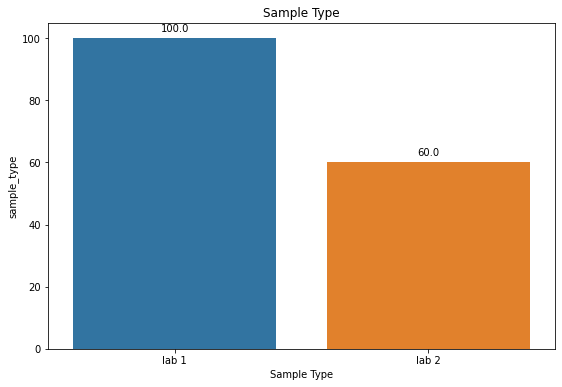

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
fig = sns.barplot(x=sample.index,y=sample, data=df )
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Sample Type')
plt.xlabel('Sample Type')

### Target

In [15]:
df.groupby(['target']).size().sort_values(ascending = False)

target
4.62    7
4.66    6
4.84    5
4.89    5
4.63    5
       ..
4.81    1
4.59    1
4.78    1
4.70    1
4.13    1
Length: 72, dtype: int64

In [16]:
targets = df['target'].value_counts().sort_values(ascending = True)

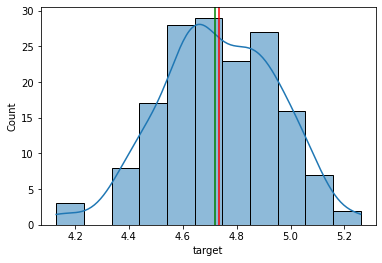

Min : 4.13
Max : 5.26
Skewness : -0.15828173643344287
Mean : 4.73375
Median : 4.720000000000001


In [17]:
sns.histplot(df.target, kde=True)
plt.axvline(df.target.mean(), color='r', label='Mean')
plt.axvline(df.target.median(), color='g', label='Median')
plt.show()
print('Min :', df.target.min())
print('Max :', df.target.max())
print('Skewness :', df.target.skew())
print('Mean :', df.target.mean())
print('Median :', df.target.median())

Text(0.5, 0, 'Target')

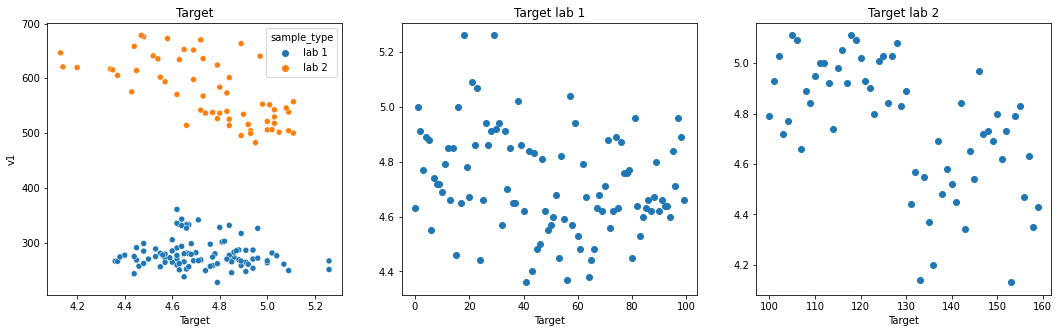

In [18]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df['target'], y=df['v1'], hue=df['sample_type'],data = df)
plt.title('Target')
plt.xlabel('Target')
plt.subplot(1,3,2)
plt.scatter(df1['target'].index, df1['target'])
plt.title('Target lab 1')
plt.xlabel('Target')
plt.subplot(1,3,3)
plt.scatter(df2['target'].index, df2['target'])
plt.title('Target lab 2')
plt.xlabel('Target')

### V1

In [19]:
v1 = df['v1'].value_counts().sort_values(ascending = True)

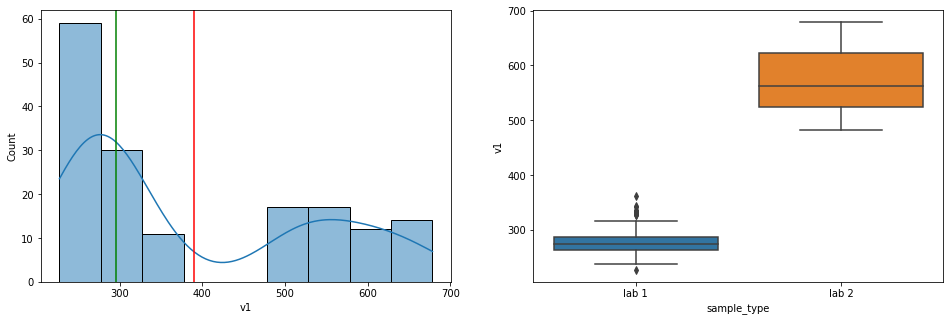

Skewness : 0.6399112607855549
Min : 227.285714285714
Max : 678.375
Mean : 389.8924368212196
Median : 295.1625


In [20]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(df.v1, kde=True)
plt.axvline(df.v1.mean(), color='r', label='Mean')
plt.axvline(df.v1.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v1', data = df)


plt.show()
print('Skewness :', df.v1.skew())
print('Min :', df.v1.min())
print('Max :', df.v1.max())
print('Mean :', df.v1.mean())
print('Median :', df.v1.median())

Perbandingan V1 Lab1 dan V1 lab 2

Text(0.5, 1.0, 'V1 lab 2')

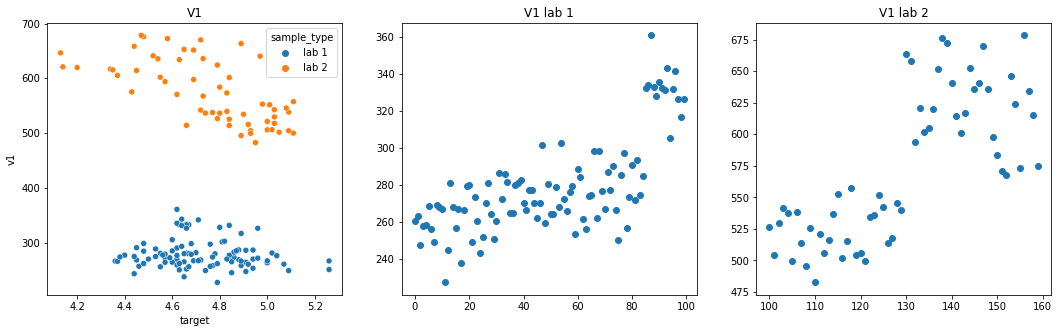

In [21]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x= df['target'],y=df['v1'],hue=df['sample_type'])
plt.title('V1')
plt.subplot(1,3,2)
plt.scatter(df1['target'].index, df1['v1'])
plt.title('V1 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['target'].index, df2['v1'])
plt.title('V1 lab 2')

## V2

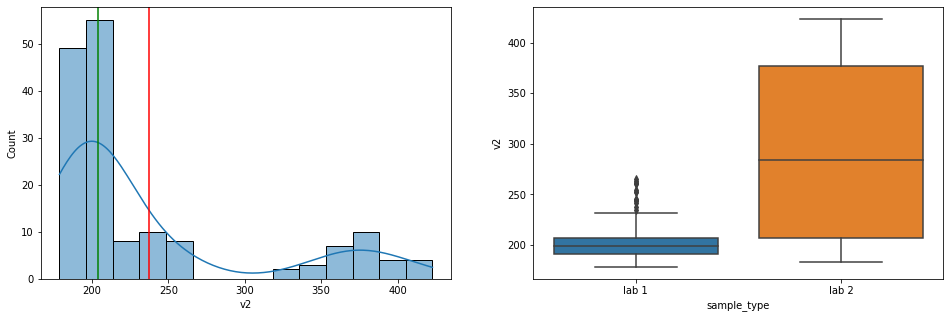

Skewness : 1.4617281099191999
Min : 178.8
Max : 422.8125
Mean : 237.44267733134902
Median : 204.1875


In [22]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(df.v2, kde=True)
plt.axvline(df.v2.mean(), color='r', label='Mean')
plt.axvline(df.v2.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v2', data = df)


plt.show()
print('Skewness :', df.v2.skew())
print('Min :', df.v2.min())
print('Max :', df.v2.max())
print('Mean :', df.v2.mean())
print('Median :', df.v2.median())

Text(0.5, 1.0, 'V2 lab 2')

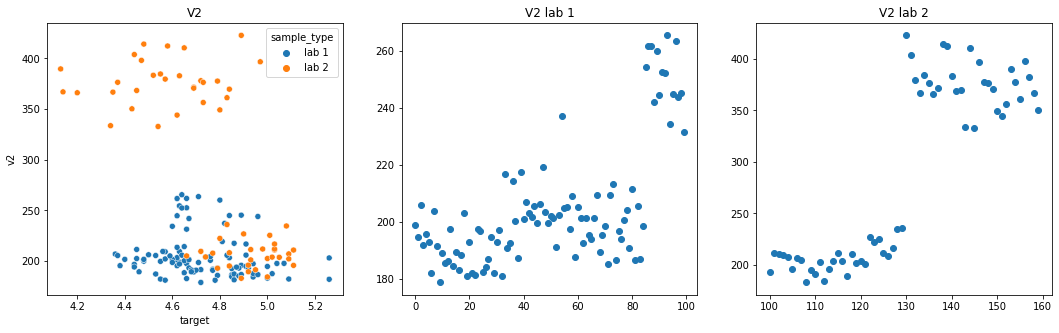

In [23]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x= df['target'],y=df['v2'],hue=df['sample_type'])
plt.title('V2')
plt.subplot(1,3,2)
plt.scatter(df1['v2'].index, df1['v2'])
plt.title('V2 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v2'].index, df2['v2'])
plt.title('V2 lab 2')

## V3

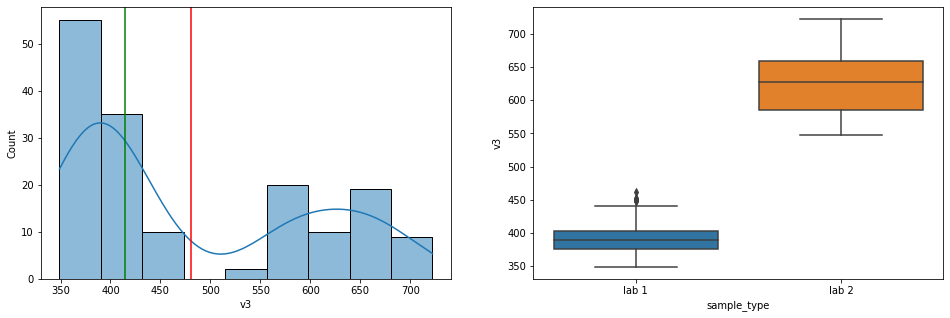

Skewness : 0.6026551795688342
Min : 348.933333333333
Max : 722.3125
Mean : 480.57304139254376
Median : 414.3839285714285


In [24]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(df.v3, kde=True)
plt.axvline(df.v3.mean(), color='r', label='Mean')
plt.axvline(df.v3.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v3', data = df)


plt.show()
print('Skewness :', df.v3.skew())
print('Min :', df.v3.min())
print('Max :', df.v3.max())
print('Mean :', df.v3.mean())
print('Median :', df.v3.median())

Text(0.5, 1.0, 'V3 lab 2')

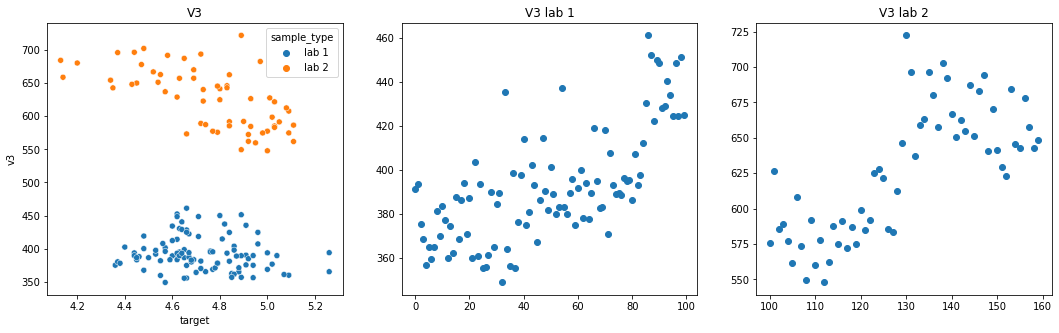

In [25]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x= df['target'],y=df['v3'],hue=df['sample_type'])
plt.title('V3')
plt.subplot(1,3,2)
plt.scatter(df1['v3'].index, df1['v3'])
plt.title('V3 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v3'].index, df2['v3'])
plt.title('V3 lab 2')

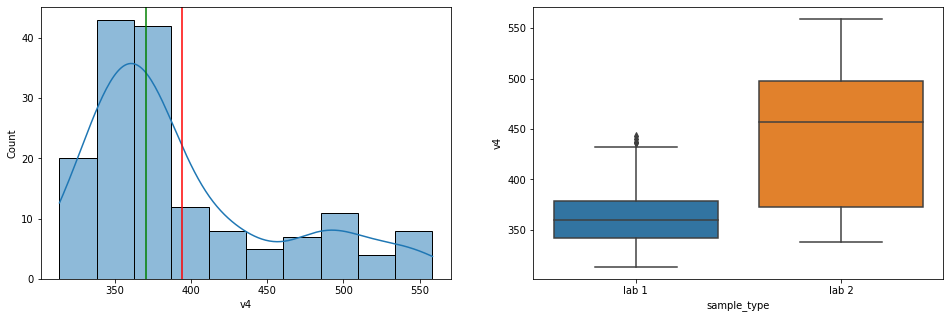

Skewness : 1.1436931932699348
Min : 313.733333333333
Max : 558.5
Mean : 394.1096222326648
Median : 370.7416666666665


In [26]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(df.v4, kde=True)
plt.axvline(df.v4.mean(), color='r', label='Mean')
plt.axvline(df.v4.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v4', data = df)


plt.show()
print('Skewness :', df.v4.skew())
print('Min :', df.v4.min())
print('Max :', df.v4.max())
print('Mean :', df.v4.mean())
print('Median :', df.v4.median())

Text(0.5, 1.0, 'V4 lab 2')

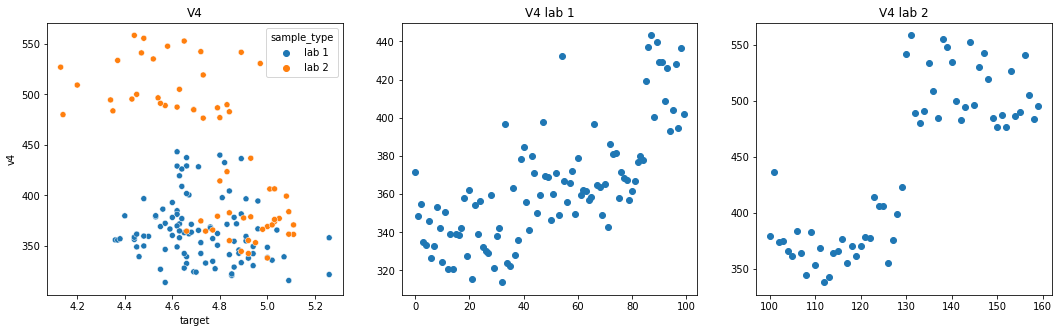

In [27]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x= df['target'],y=df['v4'],hue=df['sample_type'])
plt.title('V4')
plt.subplot(1,3,2)
plt.scatter(df1['v4'].index, df1['v4'])
plt.title('V4 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v4'].index, df2['v4'])
plt.title('V4 lab 2')

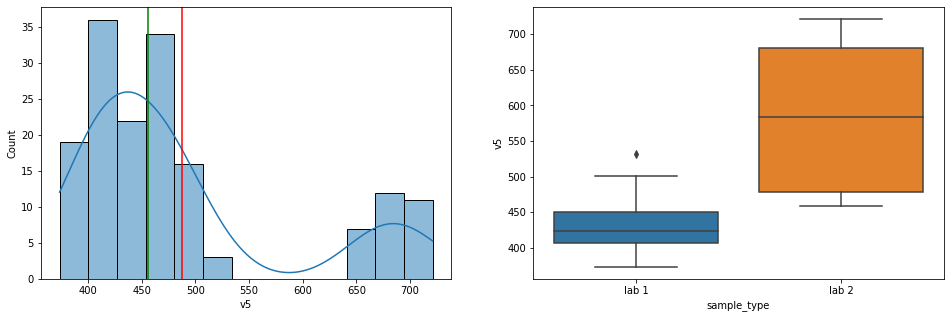

Skewness : 1.2706398850462628
Min : 373.333333333333
Max : 721.0
Mean : 487.316519684628
Median : 456.03125


In [28]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(df.v5, kde=True)
plt.axvline(df.v5.mean(), color='r', label='Mean')
plt.axvline(df.v5.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v5', data = df)


plt.show()
print('Skewness :', df.v5.skew())
print('Min :', df.v5.min())
print('Max :', df.v5.max())
print('Mean :', df.v5.mean())
print('Median :', df.v5.median())

Text(0.5, 1.0, 'V5 lab 2')

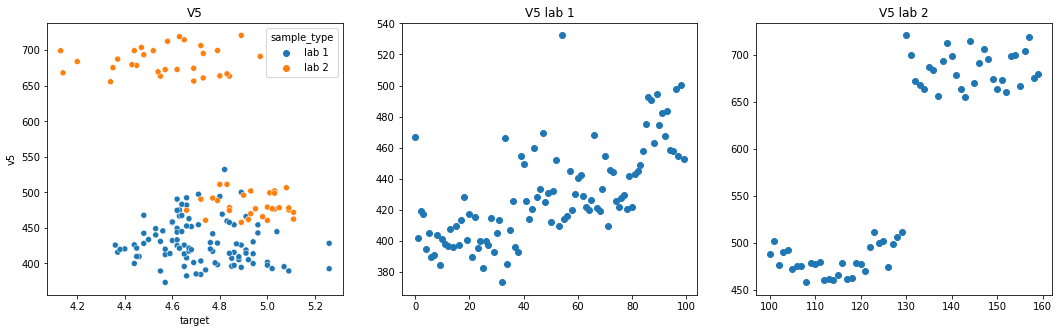

In [29]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x= df['target'],y=df['v5'],hue=df['sample_type'])
plt.title('V5')
plt.subplot(1,3,2)
plt.scatter(df1['v5'].index, df1['v5'])
plt.title('V5 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v5'].index, df2['v5'])
plt.title('V5 lab 2')

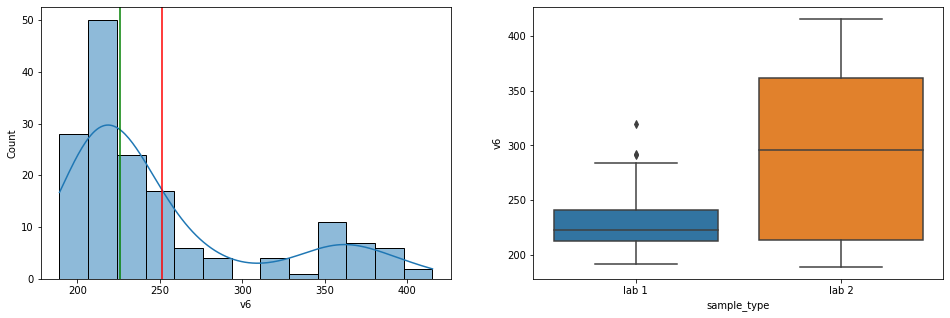

Skewness : 1.2954833782360857
Min : 189.2
Max : 415.375
Mean : 251.45082021459885
Median : 226.0625


In [30]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(df.v6, kde=True)
plt.axvline(df.v6.mean(), color='r', label='Mean')
plt.axvline(df.v6.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v6', data = df)


plt.show()
print('Skewness :', df.v6.skew())
print('Min :', df.v6.min())
print('Max :', df.v6.max())
print('Mean :', df.v6.mean())
print('Median :', df.v6.median())

Text(0.5, 1.0, 'V6 lab 2')

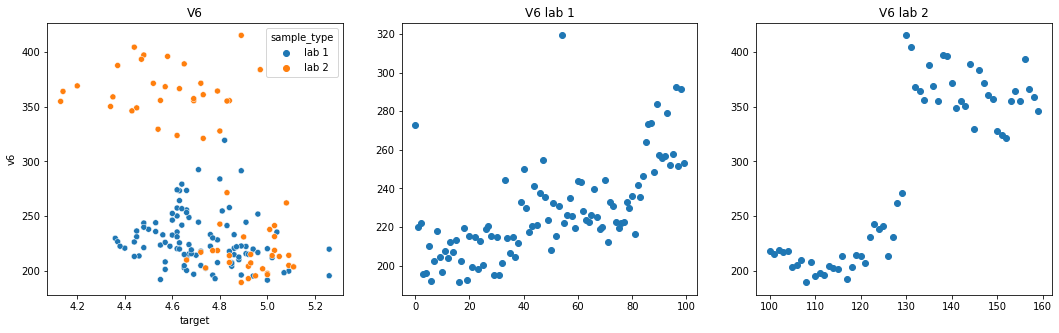

In [31]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x= df['target'],y=df['v6'],hue=df['sample_type'])
plt.title('V6')
plt.subplot(1,3,2)
plt.scatter(df1['v6'].index, df1['v6'])
plt.title('V6 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v6'].index, df2['v6'])
plt.title('V6 lab 2')

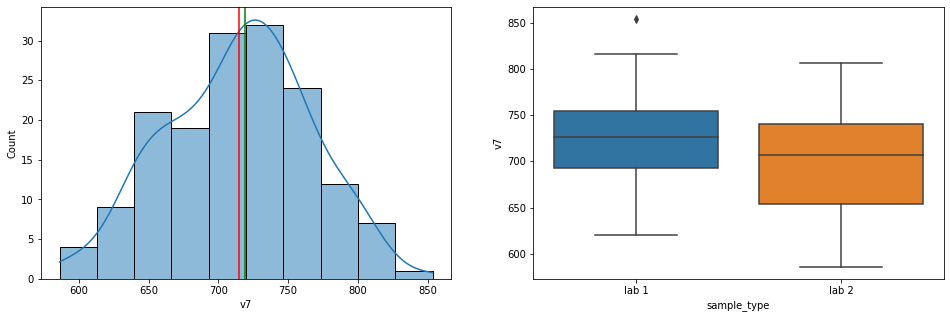

Skewness : -0.10723483952914095
Min : 586.266666666666
Max : 853.466666666666
Mean : 714.7379264567667
Median : 718.833333333333


In [32]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(df.v7, kde=True)
plt.axvline(df.v7.mean(), color='r', label='Mean')
plt.axvline(df.v7.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v7', data = df)


plt.show()
print('Skewness :', df.v7.skew())
print('Min :', df.v7.min())
print('Max :', df.v7.max())
print('Mean :', df.v7.mean())
print('Median :', df.v7.median())

Text(0.5, 1.0, 'V7 lab 2')

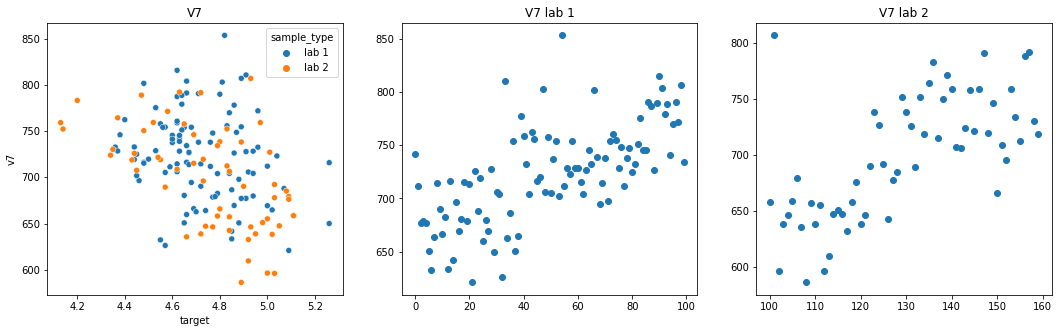

In [33]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x= df['target'],y=df['v7'],hue=df['sample_type'])
plt.title('V7')
plt.subplot(1,3,2)
plt.scatter(df1['v7'].index, df1['v7'])
plt.title('V7 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v7'].index, df2['v7'])
plt.title('V7 lab 2')

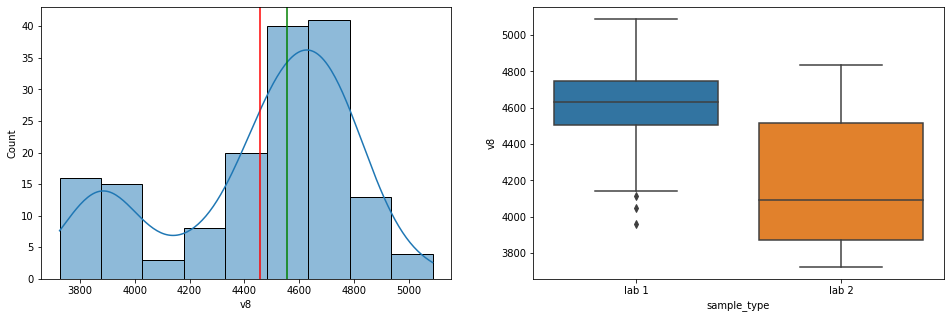

Skewness : -0.7664435142947442
Min : 3725.66666666666
Max : 5086.375
Mean : 4456.91323347431
Median : 4554.76666666666


In [34]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(df.v8, kde=True)
plt.axvline(df.v8.mean(), color='r', label='Mean')
plt.axvline(df.v8.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v8', data = df)


plt.show()
print('Skewness :', df.v8.skew())
print('Min :', df.v8.min())
print('Max :', df.v8.max())
print('Mean :', df.v8.mean())
print('Median :', df.v8.median())

Text(0.5, 1.0, 'V8 lab 2')

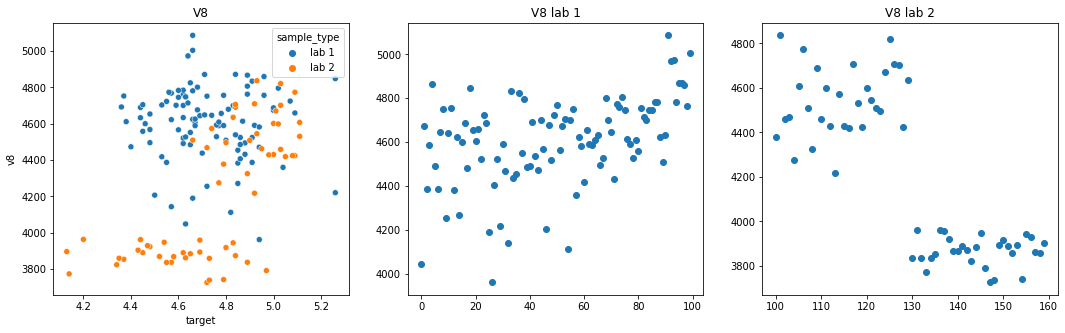

In [35]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x= df['target'],y=df['v8'],hue=df['sample_type'])
plt.title('V8')
plt.subplot(1,3,2)
plt.scatter(df1['v8'].index, df1['v8'])
plt.title('V8 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v8'].index, df2['v8'])
plt.title('V8 lab 2')

### EDA Analysis 

Setelah melihat karakteristik data dari V1 - V8 dan melakukan perbandingan lab 1 dengan lab 2 

- Lab 1 memiliki V1-V6 yang lebih rendah dari lab 2
- Namun ketika melihat grafik V7 Lab 1 sudah mulai sama dengan lab 2 dan V8 Lab 1 lebih besar dari Lab 2
- Target Lab 1 lebih rendah dari Lab 2 



### Korelasi Matrix

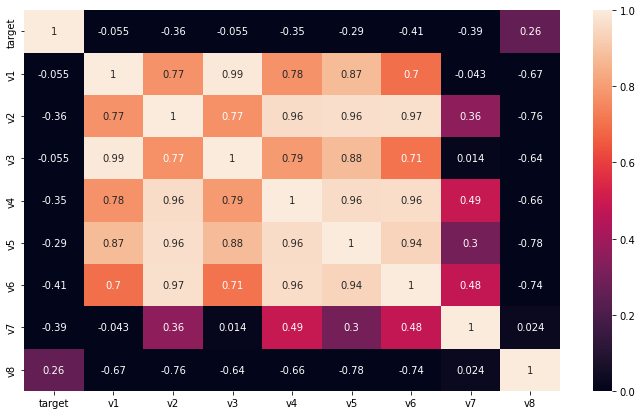

In [36]:
#korelasi matrix
corr_data = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_data, annot=True, vmin=0, vmax=1)
plt.show()

Grafik correlation matrix diatas menujukkan V1-V8 saling berkorelasi

## Data Preprocessing

In [37]:
df_train_test = df
df_train_test

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
155,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


### Feature Engineering

Setelah melakukan EDA kita mengetahui bahwa 'sample_type' hanya untuk keperluan EDA saja ( untuk membandingkan), dan untuk modelling, informasinya tidaklah penting untuk proses kedepannya. oleh karena itu saya akan menghapus column 'sample_type'

In [38]:
df_train_test.drop(columns=['sample_type'], inplace=True, axis=1)

### Handling Missing Value

In [39]:
df_train_test.isna().sum()

target    0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
dtype: int64

### Splitting Data

In [40]:
#Split between 'X' (features) and 'y' (target)
X = df_train_test.drop('target', axis=1) #axis=1 ==> column
y = df_train_test['target']
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8
0,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333
1,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667
2,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000
3,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778
4,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (128, 8)
Test Size:  (32, 8)


### Handling Outlier

#### Cek Distribusi data

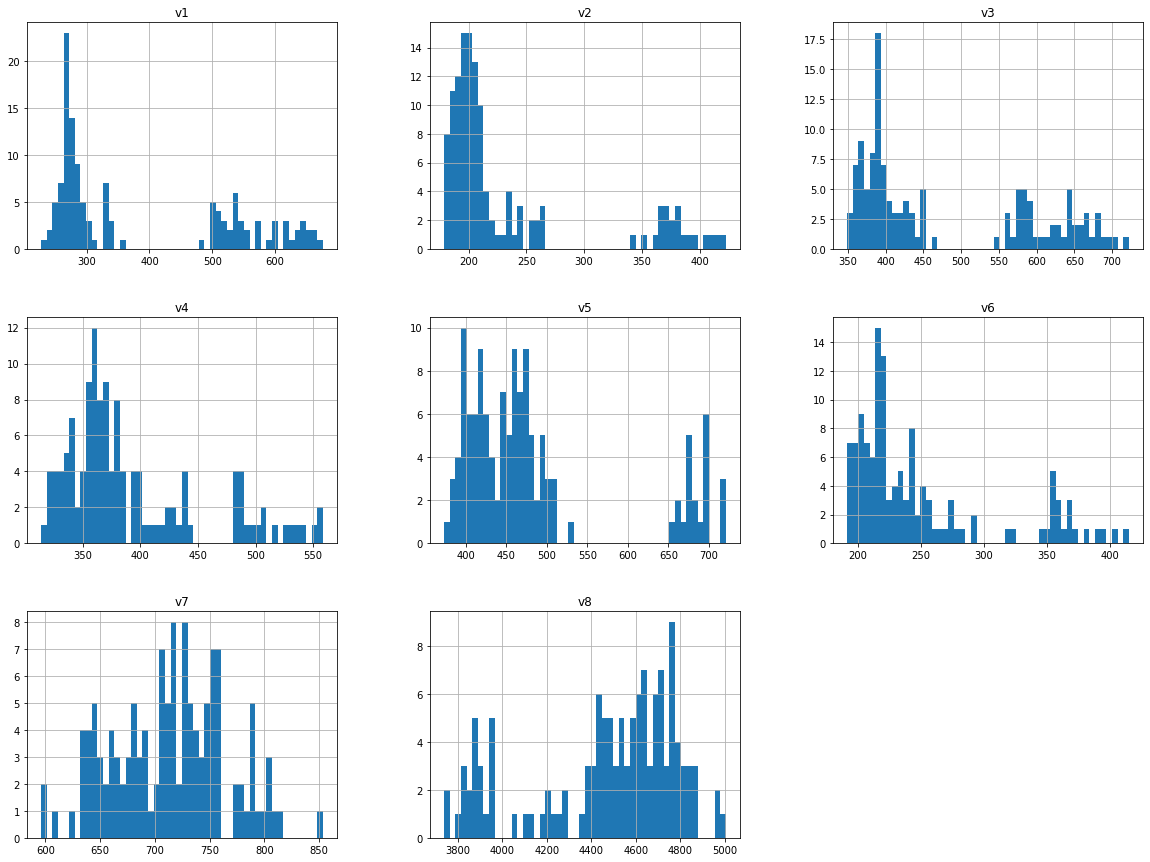

In [42]:
#cek distribution
X_train.hist(bins=50, figsize=(20, 15))
plt.show()

In [43]:
# Making a function to visualize the outliers and graph
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [44]:
# Function mencari outlier
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [45]:
# Looping to check the Distribution of each column
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []
for x in range(len(dist_check)):
    if dist_check.values[x] < -0.5:
        skew_dist.append(dist_check.index[x])
    elif dist_check.values[x] > 0.5:
        skew_dist.append(dist_check.index[x])
    else:
        normal_dist.append(dist_check.index[x])

In [46]:
# Skewed distribution
print('Skewed distribution :', skew_dist)
print("")
# Normal distribution
print('Normal distribution :',normal_dist)

Skewed distribution : ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v8']

Normal distribution : ['v7']


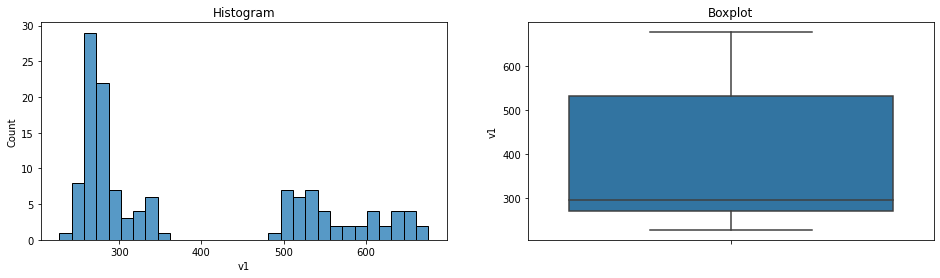

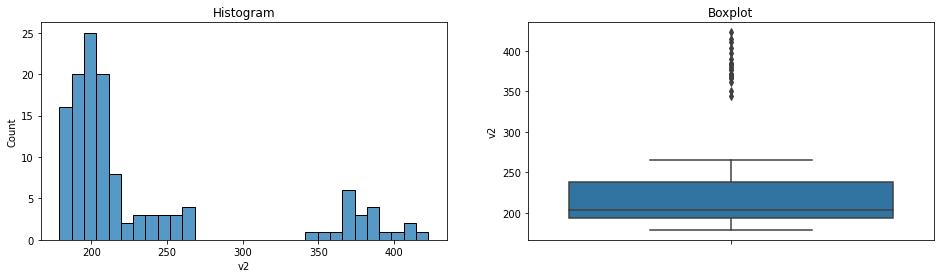

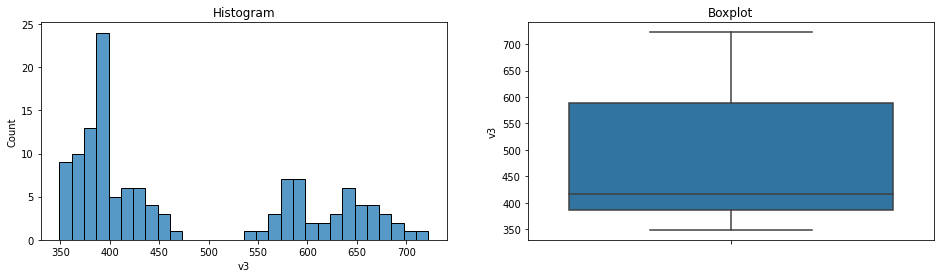

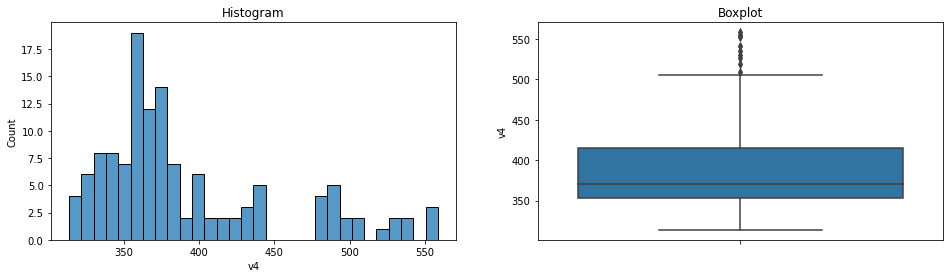

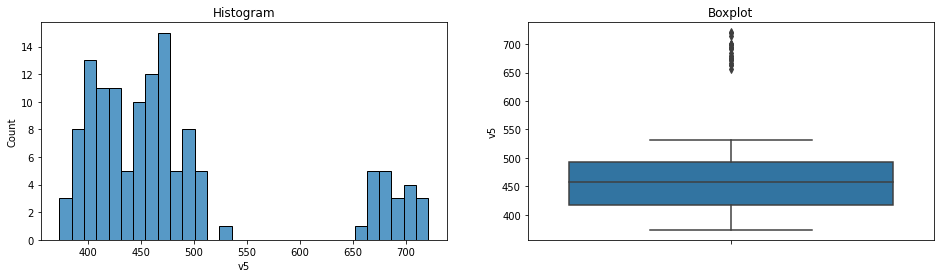

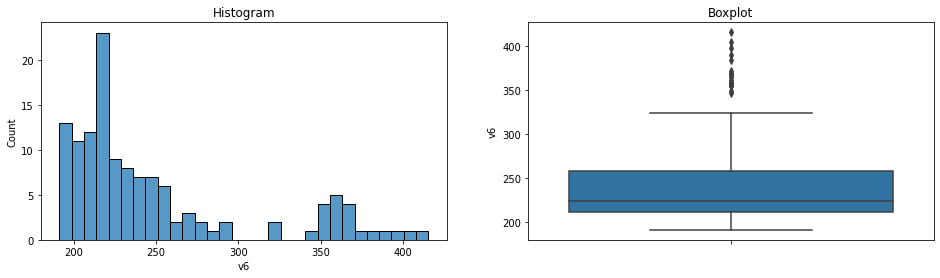

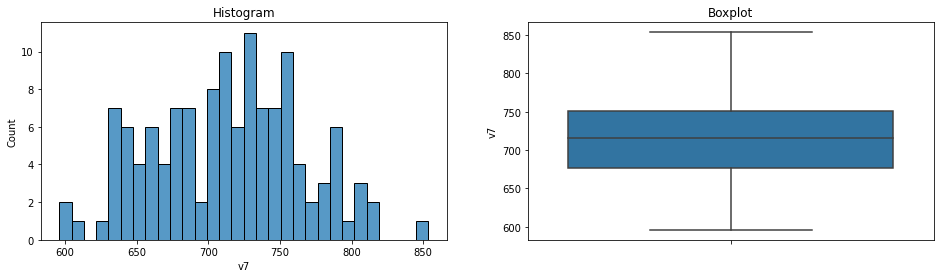

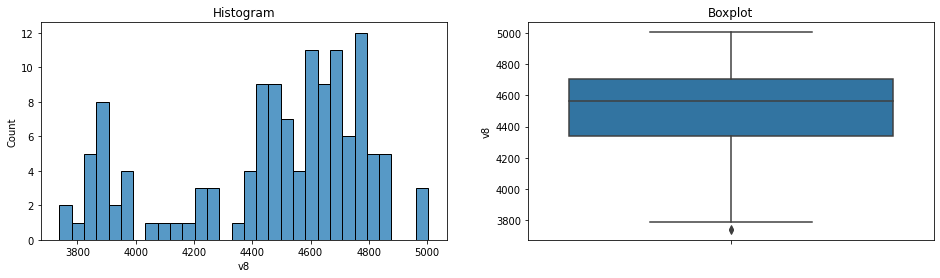

In [47]:
#Visualising the outliers
diagnostic_plots(X_train,'v1')
diagnostic_plots(X_train,'v2')
diagnostic_plots(X_train,'v3')
diagnostic_plots(X_train,'v4')
diagnostic_plots(X_train,'v5')
diagnostic_plots(X_train,'v6')
diagnostic_plots(X_train,'v7')
diagnostic_plots(X_train,'v8')

In [48]:
#Making a function to check the outliers of the data with Skewed Distributed 
def detect_skew(df, variable, distance):
    
    for i in variable:
        
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        upper_boundary_count = df[(df[variable] > upper_boundary)][variable].count()

        lower_boundary_count = df[(df[variable] < lower_boundary)][variable].count()
        
        total_count = upper_boundary_count + lower_boundary_count

        percentage = (total_count/len(df[variable])*100)

        text = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(text)

In [49]:
#Checking the outliers in the normal range
for i in skew_dist:
    detect_skew(X_train, variable=i, distance=1.5)

{'Variable': 'v1', 'Total Outliers': 0, 'Percentage': 0.0}
{'Variable': 'v2', 'Total Outliers': 21, 'Percentage': 16.40625}
{'Variable': 'v3', 'Total Outliers': 0, 'Percentage': 0.0}
{'Variable': 'v4', 'Total Outliers': 9, 'Percentage': 7.03125}
{'Variable': 'v5', 'Total Outliers': 21, 'Percentage': 16.40625}
{'Variable': 'v6', 'Total Outliers': 20, 'Percentage': 15.625}
{'Variable': 'v8', 'Total Outliers': 2, 'Percentage': 1.5625}


karena data hanya berjumlah 160 maka tidak dilakukan pengurangan outlier

### Feature Selection 

In [50]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Categorical Columns :  []


In [51]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]


X_test_num = X_test[num_columns]


### Feature Scaling menggunakan Pipeline

In [52]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        
    ])
num_pipeline.fit(X_train_num)
X_train_final = num_pipeline.fit_transform(X_train_num)
X_test_final = num_pipeline.fit_transform(X_test_num)

#### Display as DataFrame


In [53]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns])
X_train_final_df

,v1,v2,v3,v4,v5,v6,v7,v8
0,-0.816225,-0.633943,-0.838988,-0.633706,-0.824977,-0.539254,0.018982,0.872199
1,-0.874032,-0.543203,-1.014226,-0.866760,-0.907603,-0.879937,-0.498003,0.788276
2,-0.564138,-0.003550,-0.381271,0.024267,-0.255191,0.059431,0.537098,0.971237
3,-0.582567,0.039916,-0.354678,0.678792,0.509477,1.218850,2.713313,-1.109537
4,1.043571,-0.449270,0.944636,-0.445566,-0.230571,-0.804181,-1.288266,0.320322
...,...,...,...,...,...,...,...,...
123,1.280881,1.614485,1.304625,1.588999,1.967675,1.295326,-0.093174,-1.798348
124,-0.484600,0.158529,-0.233168,0.744541,0.176943,0.735818,1.812186,0.906765
125,0.886234,-0.388490,0.928420,-0.601832,-0.088038,-0.609382,-1.377959,0.731161
126,-0.831872,-0.757774,-0.947201,-0.878144,-0.885575,-0.997899,-0.859197,0.673272


### Feature Importance

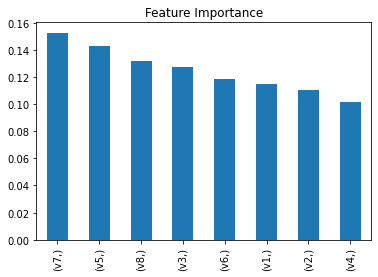

In [54]:
# Menghitung feature importance dengan menggunakan Extra trees regressor

model_fi = ExtraTreesRegressor(random_state=32) #model feature importance
model_fi.fit(X_train_final_df,y_train) # pada data X terhadap y dilakukan training (fit)
feat_importances = pd.Series(model_fi.feature_importances_, index = X_train_final_df.columns) # memasukan feature importance dengan index nama column pada data X (features)
feat_importances.nlargest(16).plot(kind='bar') # plot bar
plt.title('Feature Importance')
plt.show()

## Model Definition

Saya akan menggunakan 4 model yaitu LinearRegression,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor dan membandingkan score nya untuk mencari score yang terbaik untuk dijadikan prediksi model inference.

In [55]:
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=20)
forest_reg = RandomForestRegressor(random_state=31)
xgb_reg = XGBRegressor()

## Model Training

### Linear Regression

In [56]:
lin_reg.fit(X_train_final,y_train)

LinearRegression()

In [57]:
lin_reg_predict = lin_reg.predict(X_test_final)

In [58]:
print("Mean squared error:",mean_squared_error(y_test,lin_reg_predict))
print("Mean absolute error:",mean_absolute_error(y_test,lin_reg_predict))
print("R2 score:",r2_score(y_test,lin_reg_predict))

Mean squared error: 0.042643428220765514
Mean absolute error: 0.16549447552760835
R2 score: 0.05048695662056257


### Cross Validation Linear Regression

In [59]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [60]:
scores = cross_val_score(lin_reg, X_train_final, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [61]:
display_scores(lin_rmse_scores)

Scores: [0.19865764 0.12798134 0.1823778  0.17350466 0.25472518 0.1828936
 0.22533284 0.1873991  0.18896103 0.16138717]
Mean: 0.18832203520171997
Standard deviation: 0.03246244713722163


### Desicion Tree Regressor

In [62]:
tree_reg.fit(X_train_final,y_train)

DecisionTreeRegressor(random_state=20)

In [63]:
tree_reg_predict = tree_reg.predict(X_test_final)


In [64]:
print("Mean squared error:",mean_squared_error(y_test,tree_reg_predict))
print("Mean absolute error:",mean_absolute_error(y_test,tree_reg_predict))
print("R2 score:",r2_score(y_test,tree_reg_predict))

Mean squared error: 0.08638437499999993
Mean absolute error: 0.23031249999999998
R2 score: -0.9234638074135608


### Cross Validation Desicion Tree

In [65]:
scores = cross_val_score(tree_reg, X_train_final, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [66]:
display_scores(tree_rmse_scores)

Scores: [0.27225554 0.24746406 0.19641009 0.18208198 0.26944387 0.23748684
 0.2369031  0.2092845  0.22299103 0.14628739]
Mean: 0.22206083871508828
Standard deviation: 0.037456940220605105


### Random Forest Regressor

In [67]:
forest_reg.fit(X_train_final,y_train)

RandomForestRegressor(random_state=31)

In [68]:
forest_reg_predict = forest_reg.predict(X_test_final)


In [69]:

print("Mean squared error:",mean_squared_error(y_test,forest_reg_predict))
print("Mean absolute error:",mean_absolute_error(y_test,forest_reg_predict))
print("R2 score:",r2_score(y_test,forest_reg_predict))

Mean squared error: 0.04867164531249999
Mean absolute error: 0.1794218750000002
R2 score: -0.08373937075846993


### Cross Validation Random Forest

In [70]:
scores = cross_val_score(forest_reg, X_train_final, y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [71]:
display_scores(forest_rmse_scores)

Scores: [0.19023467 0.133409   0.18118069 0.14805622 0.27138078 0.17924353
 0.19029827 0.19400341 0.21679669 0.13862537]
Mean: 0.18432286352614963
Standard deviation: 0.0385089906349868


### Extreme Gradient Boosting Regressor

In [72]:
xgb_reg.fit(X_train_final,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [73]:
xgb_reg_predict = xgb_reg.predict(X_test_final)


In [74]:
print("Mean squared merror:",mean_squared_error(y_test,xgb_reg_predict))
print("Mean absolute error:",mean_absolute_error(y_test,xgb_reg_predict))
print("R2 score:",r2_score(y_test,xgb_reg_predict))

Mean squared merror: 0.05126884126163614
Mean absolute error: 0.17860029041767111
R2 score: -0.14156941709410042


### Cross Validation Xtreme Gradient Boosting Regressor

In [75]:
scores = cross_val_score(xgb_reg, X_train_final, y_train,
                         scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-scores)

In [76]:
display_scores(xgb_rmse_scores)

Scores: [0.20237348 0.12178228 0.18291306 0.15824052 0.23943853 0.18569681
 0.21639713 0.21064729 0.23982165 0.15047758]
Mean: 0.19077883409824273
Standard deviation: 0.03672820054933401


Membandingkan MSE antar model dan mencari mana yang paling rendah (dengan cross validation)

In [77]:
print("Linear Regression Score")
display_scores(lin_rmse_scores)
print()
print("Desicion Tree Regression Score")
display_scores(tree_rmse_scores)
print()
print("Random Forest Regression Score")
display_scores(forest_rmse_scores)
print()
print("XGB Regression Score")
display_scores(xgb_rmse_scores)

Linear Regression Score
Scores: [0.19865764 0.12798134 0.1823778  0.17350466 0.25472518 0.1828936
 0.22533284 0.1873991  0.18896103 0.16138717]
Mean: 0.18832203520171997
Standard deviation: 0.03246244713722163

Desicion Tree Regression Score
Scores: [0.27225554 0.24746406 0.19641009 0.18208198 0.26944387 0.23748684
 0.2369031  0.2092845  0.22299103 0.14628739]
Mean: 0.22206083871508828
Standard deviation: 0.037456940220605105

Random Forest Regression Score
Scores: [0.19023467 0.133409   0.18118069 0.14805622 0.27138078 0.17924353
 0.19029827 0.19400341 0.21679669 0.13862537]
Mean: 0.18432286352614963
Standard deviation: 0.0385089906349868

XGB Regression Score
Scores: [0.20237348 0.12178228 0.18291306 0.15824052 0.23943853 0.18569681
 0.21639713 0.21064729 0.23982165 0.15047758]
Mean: 0.19077883409824273
Standard deviation: 0.03672820054933401


Random Forest mempunyai model terbaik dengan mean terkecil yaitu Mean: 0.18432286352614963

maka akan dilakukan model improvement dengan model Random Forest dengan menambahkan hyperparameter

## Model Improvement

Random Forest Regression Grid Search dengan Pipeline

In [78]:
pipeline_forest = Pipeline([
    ('regression',RandomForestRegressor(random_state=50))])

forest_param = { "regression__n_estimators"      : [10,20,30],
                 "regression__max_features"      : ["sqrt", "log2"],
                 "regression__min_samples_split" : [2,4,8],
                 "regression__bootstrap": [True, False],}


In [79]:
forest_model = pipeline_forest.fit(X_train_final, y_train)

In [80]:
grid_forest = GridSearchCV(pipeline_forest, forest_param, cv=10, n_jobs = 1, verbose=1)

grid_forest.fit(X_train_final,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('regression',
                                        RandomForestRegressor(random_state=50))]),
             n_jobs=1,
             param_grid={'regression__bootstrap': [True, False],
                         'regression__max_features': ['sqrt', 'log2'],
                         'regression__min_samples_split': [2, 4, 8],
                         'regression__n_estimators': [10, 20, 30]},
             verbose=1)

In [81]:
#best parameter forest
print("Best parameters: ", grid_forest.best_params_)

Best parameters:  {'regression__bootstrap': True, 'regression__max_features': 'sqrt', 'regression__min_samples_split': 8, 'regression__n_estimators': 30}


In [82]:
grid_forest.best_estimator_

Pipeline(steps=[('regression',
                 RandomForestRegressor(max_features='sqrt', min_samples_split=8,
                                       n_estimators=30, random_state=50))])

## Model Evaluation

In [83]:
#Predict train set and test set random_forest hyperparameter
y_pred_train_forest_grid = grid_forest.predict(X_train_final)
y_pred_test_forest_grid = grid_forest.predict(X_test_final)

In [84]:
print('MAE Train-Set  : ', mean_absolute_error(y_train, y_pred_train_forest_grid))
print('MAE Test-Set  : ', mean_absolute_error(y_test, y_pred_test_forest_grid))
print()
print('MSE Train-Set  : ', mean_squared_error(y_train, y_pred_train_forest_grid))
print('MSE Test-Set  : ', mean_squared_error(y_test, y_pred_test_forest_grid))
print()
print('RMSE Train-Set  : ', np.sqrt(mean_squared_error(y_train, y_pred_train_forest_grid)))
print('RMSE Test-Set  : ', np.sqrt(mean_squared_error(y_test, y_pred_test_forest_grid)))
print()
print('R2 Train-Set  : ', r2_score(y_train, y_pred_train_forest_grid))
print('R2 Test-Set  : ', r2_score(y_test, y_pred_test_forest_grid))

MAE Train-Set  :  0.08602088368424529
MAE Test-Set  :  0.18481831635650545

MSE Train-Set  :  0.012710225734042476
MSE Test-Set  :  0.050173335349400425

RMSE Train-Set  :  0.11273963692527343
RMSE Test-Set  :  0.22399405204022813

R2 Train-Set  :  0.7085283515825178
R2 Test-Set  :  -0.11717651070341395


### Model Saving

In [85]:
# Model Saving

import json

with open('model_forest_tuning.pkl', 'wb') as file_model:
  pickle.dump(grid_forest, file_model)

with open('scaler.pkl', 'wb') as file_scaler:
  pickle.dump(num_pipeline, file_scaler)

with open('list_num_cols.txt', 'w') as file_num:
  json.dump(num_columns, file_num)

## Overall Analysis

### EDA Analysis 

Setelah melihat karakteristik data dari V1 - V8 dan melakukan perbandingan lab 1 dengan lab 2 

- Lab 1 memiliki V1-V6 yang lebih rendah dari lab 2
- Namun ketika melihat grafik V7 Lab 1 sudah mulai sama dengan lab 2 dan V8 Lab 1 lebih besar dari Lab 2
- Target Lab 1 lebih rendah dari Lab 2 

### Metadologi pemilihan Model
- Dipilihnya Random Forest Regressor untuk melakukan plant nutrition prediction karena setelah membadingkan dengan model yang lain, random forest regression memiliki akurasi yang lebih akurat daripada model yang lainnya

- Evaluasi Model Random Forest 
Random Forest Modelling berhasil melakukan prediksi dengan error sebagai berikut

MAE Train-Set  :  0.08602088368424529

MAE Test-Set  :  0.18481831635650545

MSE Train-Set  :  0.012710225734042476

MSE Test-Set  :  0.050173335349400425

RMSE Train-Set  :  0.11273963692527343

RMSE Test-Set  :  0.22399405204022813

### Future Improvement
- Karena deskripsi data kurang lengkap, maka kurangnya analisis mendalam terhadap data, dan menterkaitkan satu variabel dengan variabel lainnya. Future improvement nya adalah jika data deskripsi sudah jelas maka akan dilakukan analisis mendalam terhadap Variabel antar variabel dan dapat memberikan insight yang berguna untuk perusahaan
